# Car Price Prediction

In this project, a **multiple linear regression model** is built to predict car prices in the US market. Data of different types of cars gathered from various market surveys is utilized to *identify variables which predict the price of a car and how these prices vary.* 

The **aim** of this project is to model the price of cars with the available independent variables. This model will be utilized the the management to understand how the prices vary with the variables, manipulate the design, business strategy, etc. to meet certain price level and capture some market share. The model will be a useful way to understand the pricing dynamics of the US market.

Libraries used in this project: **Numpy, Pandas, Matplotlib, Seaborn, Statsmodels, Scikit-learn**

## Content

**1. Introduction** <br>
1.1 - Understanding the Business Problem <br>
1.2 - Data <br>
1.3 - Importing Modules and Pulling Data <br>

**2. Data Preparation** <br>
2.1 - Data Cleaning <br>
2.2 - Exploratory Data Analysis <br>
2.3 - Dummy Encoding <br>

**3. Model Building** <br>
3.1 - Test-Train Split, Scaling, and X and y split <br>
3.2 - Eliminating Features through RFE <br>
3.3 - Building a linear model through statmodels <br>

**4. Model Evaluation** <br>
4.1 - Residual Analysis <br>
4.2 - Predicting on the Test Data <br>
4.3 - Evaluating the Model <br>

## 1. Introduction

### 1.1 - Understanding the Business Problem

A Chinese automobile company **Geely Auto** aspires to enter the US market by setting up a local manufacturing unit to produce cars and give competition to their US and European competitors. They wish to identify and understand factors affecting the price of cars in the American market. They specifically want to know:
* Which variables are significant in the prediction of car prices 
* How well these variables describe the price of a car

They have gathered a large dataset of different types of cars in the American market based on various market surveys.

### 1.2 - Data

The data for this project contains 1 source of data and an associated data dictionary.

The dataset *('CarPrice_Assignment.csv')* contains information about various car models in the American market. The dataset contains a total of 25 predictor variables and the target variable (Price). <br>

**NOTE:** The above dataset is sourced from the below link. <br>
Link: https://archive.ics.uci.edu/ml/datasets/Automobile

### 1.3 - Importing Modules and Pulling Data

In [1]:
# importing the basic modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the required modules to build the linear regression model

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# pulling data
cars = pd.read_csv('CarPrice_Assignment.csv')

## 2. Data Preparation

Consists of the following: <br>
2.1 - Data Cleaning <br>
2.2 - Exploratory Data Analysis <br>
2.3 - Dummy Encoding

### 2.1 - Data Cleaning

In this section, the dataset has been checked for missing values, datatype issues, outliers, and duplicated values. The CarName column has been modified to only include the car brand's name. Spelling errors in this column has been dealt with.

In [4]:
# previewing the data
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# checking the shape of the dataset
cars.shape

(205, 26)

The dataset is a very small dataset in quantity with only 205 rows and 26 columns. Each row describes information about 1 car model.

In [6]:
# checking for null values
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

The dataset is also remarkably clean with no missing values which means we don't have to impute any values or delete any rows or columns.

In [7]:
# checking datatype composition
print("data types for cars dataset are \n{}".format(cars.dtypes.value_counts()))

data types for cars dataset are 
object     10
float64     8
int64       8
dtype: int64


In [8]:
# checking datatypes
print("data types for cars dataset are \n{}".format(cars.dtypes))

data types for cars dataset are 
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


Above, the datatype composition and the datatypes for each column for the cars dataset can be seen. After going through the columns and their datatypes, all the columns have the correct datatype.

In [9]:
# checking for outliers
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


By comparing the mean and median of the above columns, there is no possibility of outliers in all the columns except for in **compressionratio**. <br>

The mean is *10.14* while the median is *9.0*. However, the 75th percentile for this variable is *9.4* which is lower than the mean. <br>

Let's analyze this variable.

In [10]:
# checking for outliers in the compressionratio variable
cars.compressionratio.describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compressionratio, dtype: float64

In [11]:
# looking at the top 10 values in compressionratio
cars.compressionratio.sort_values(ascending = False).head(25)

187    23.0
203    23.0
182    23.0
192    23.0
184    23.0
63     22.7
174    22.5
158    22.5
159    22.5
66     22.0
90     21.9
68     21.5
69     21.5
67     21.5
70     21.5
112    21.0
108    21.0
110    21.0
114    21.0
116    21.0
49     11.5
32     10.1
188    10.0
129    10.0
3      10.0
Name: compressionratio, dtype: float64

From the above breakdown of the column and the highest values, we notice that the reason for the difference in mean and median is due to few cars with better compression ratios than the column containing erroneous outliers. <br>

Therefore, we don't have to make any changes and can proceed with the analysis.

In [12]:
# checking for duplicate values
cars.loc[cars.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


From the CarName column, the car manufacturer should be extracted from the entire car name to be considered for our model.

In [13]:
cars.CarName.head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [14]:
# splitting car manufacturer from entire car name and renaming column
cars['CarName'] = cars['CarName'].apply(lambda x: x.split(" ")[0])
cars.rename(columns = {"CarName":"car_brand"}, inplace = True)
cars.head()

,car_ID,symboling,car_brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
# checking for all the unique car brands to spot any errors
cars['car_brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

As we can see there are a lot of spelling errors and capital errors which need to be corrected.

*maxda* should be **mazda** <br>
*porcshce* should be **porsche** <br>
*toyouta* should be **toyota** <br>
*vokswagen* and *vw* should be **volkswagen** <br>
*Nissan* should be lower capitalized to **nissan** <br>

In [16]:
# correcting spelling errors and lower capitalizing everything
cars['car_brand'].replace("maxda","mazda", inplace = True)
cars['car_brand'].replace("porcshce","porsche", inplace = True)
cars['car_brand'].replace("toyouta","toyota", inplace = True)
cars['car_brand'].replace("vokswagen","volkswagen", inplace = True)
cars['car_brand'].replace("vw","volkswagen", inplace = True)
cars['car_brand'].replace("Nissan","nissan", inplace = True)
cars['car_brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### 2.2 - Exploratory Data Analysis

Now that the data has been cleaned, it is ready for analysis. Columns in the dataset will be analysed to gather any pre model building insights.<br>

Contains the following parts:<br>
2.2a - Target Variable Analysis <br>
2.2b - Categorical Variable Analysis<br>
2.2c - Continuous Variable Analysis<br>
2.2d - Bivariate Analysis <br>

In [17]:
# columns in dataset
cars.columns

Index(['car_ID', 'symboling', 'car_brand', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

#### 2.2a - Target Variable Analysis

Let's first analyze the target variable; **price**.

In [18]:
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

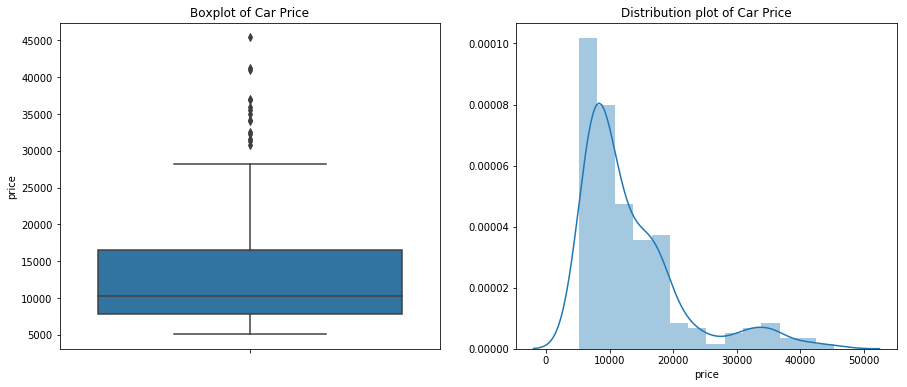

In [19]:
# plots to analyze price column
plt.figure(figsize =(15,6))

plt.subplot(121)
plt.title("Boxplot of Car Price")
sns.boxplot(y=cars.price)

plt.subplot(122)
plt.title("Distribution plot of Car Price")
sns.distplot(cars.price)

plt.show()

From the above analysis, we have the following observations:

*  There is a significant difference between the median and the mean.
*  From the boxplot we can see that the spread of the prices is a lot which indicates high variance. 
*  The distribution plot is right skewed indicating that most car prices are on the lower end.

#### 2.2b - Categorical Variable Analysis

Let's analyze the categorical variables in the dataset. <br>

The categorical variables are **'symboling', 'car_brand', 'fueltype', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', and 'fuelsystem'.**

In [20]:
# function to plot graphs for univariate analysis for categorical variable
def univariate_cat(df,col):
    '''
    Univariate function will plot a Boxplot based on the parameters.
    df      : dataframe name
    col     : Column name
    '''
    sns.set(style="darkgrid")
    plt.figure(figsize=(20,8))
    
    plt.subplot(121)
    plt.title("Frequency plot for {}".format(str(col)))
    a =sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    
    plt.subplot(122)
    plt.title("{} vs. price".format(str(col)))
    b = sns.boxplot(data=df, x=col, y=df.price, order=df[col].value_counts().index)
    b.set_xticklabels(b.get_xticklabels(),rotation=90)
    
    plt.show()

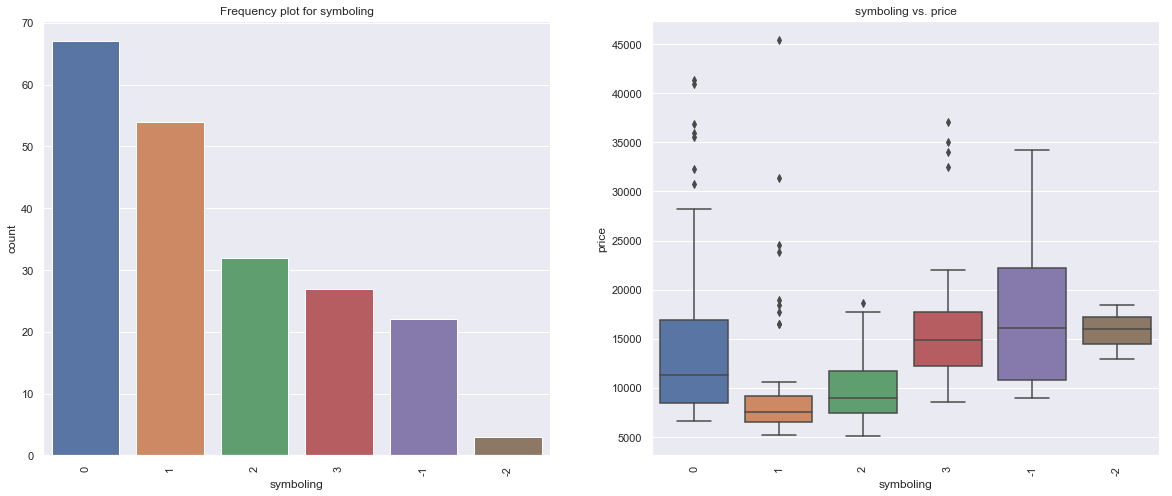

In [21]:
univariate_cat(cars,'symboling')

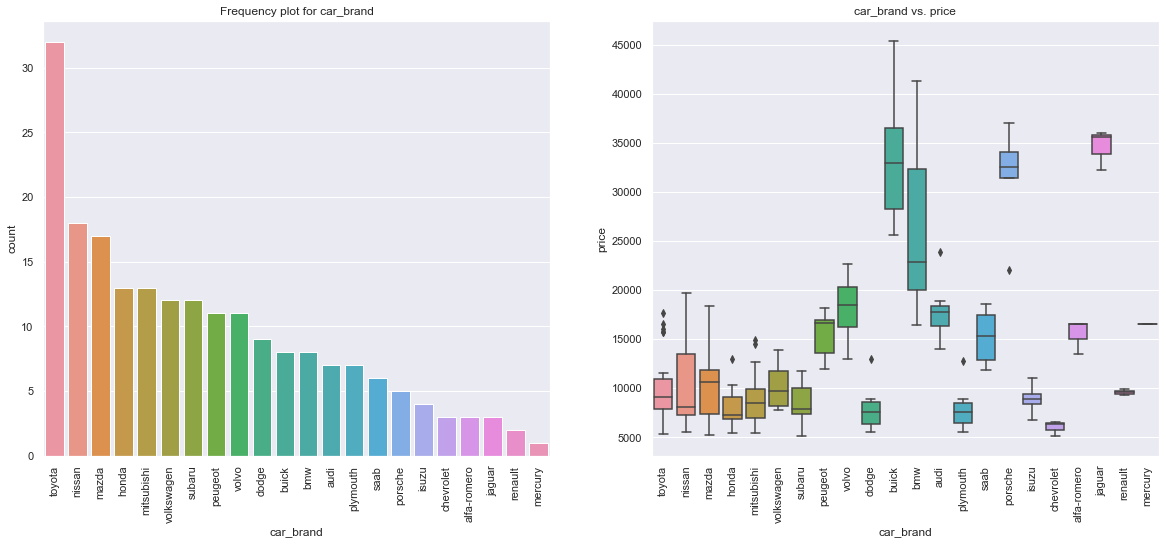

In [22]:
univariate_cat(cars,'car_brand')

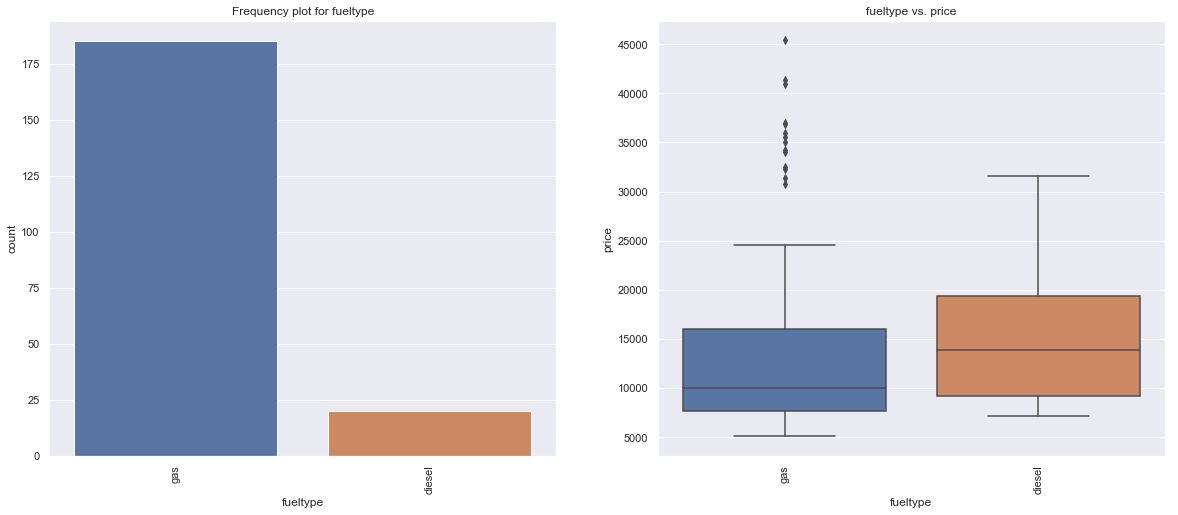

In [23]:
univariate_cat(cars,'fueltype')

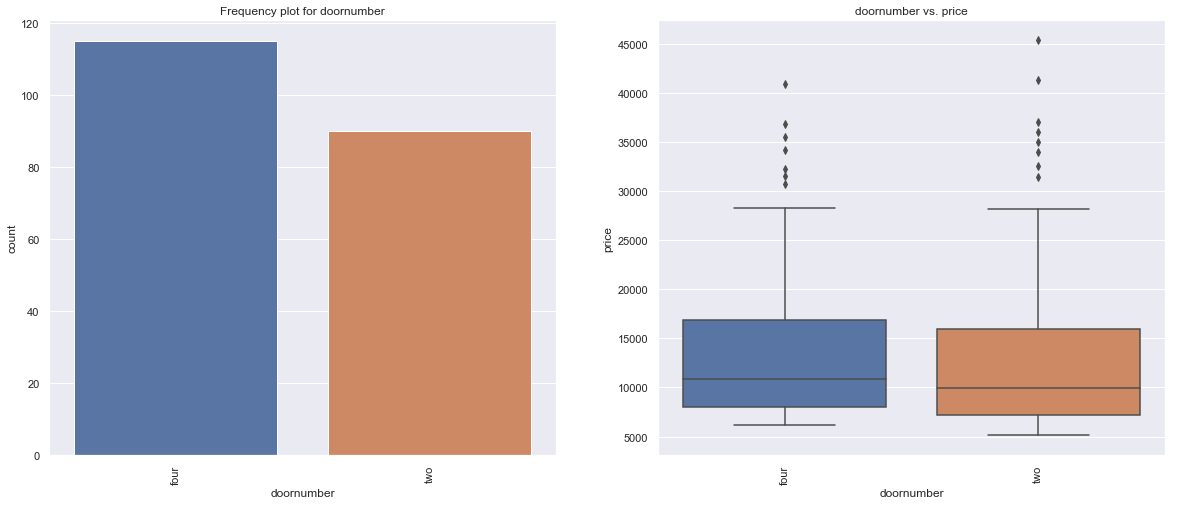

In [24]:
univariate_cat(cars,'doornumber')

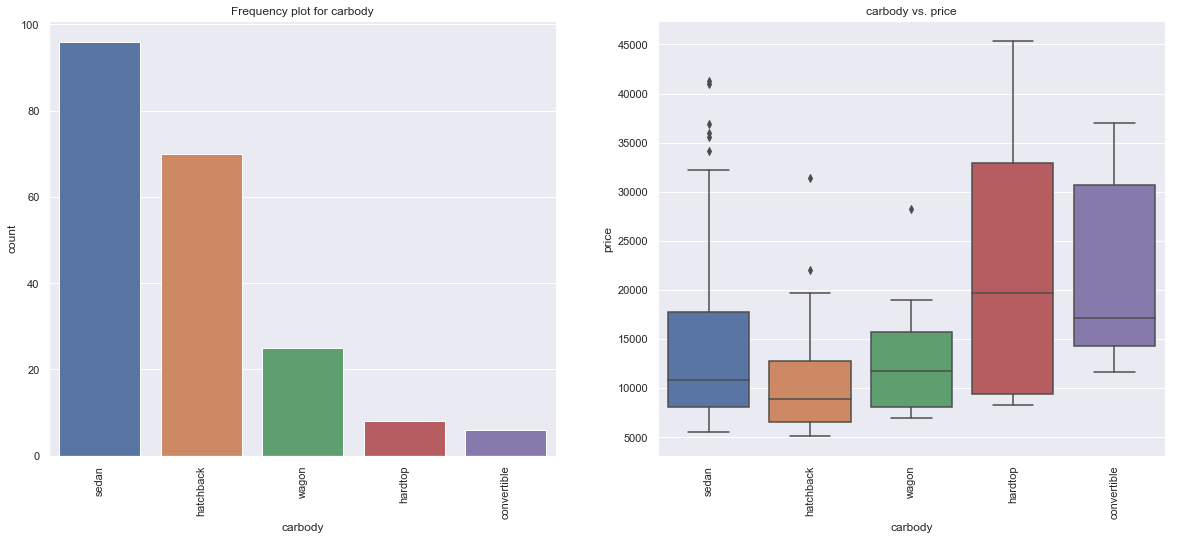

In [25]:
univariate_cat(cars,'carbody')

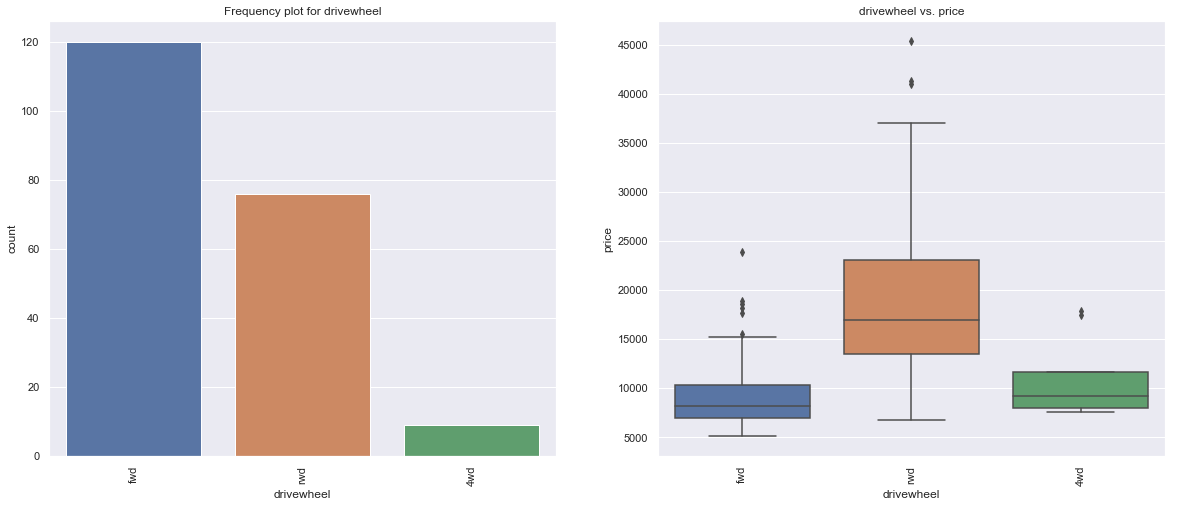

In [26]:
univariate_cat(cars,'drivewheel')

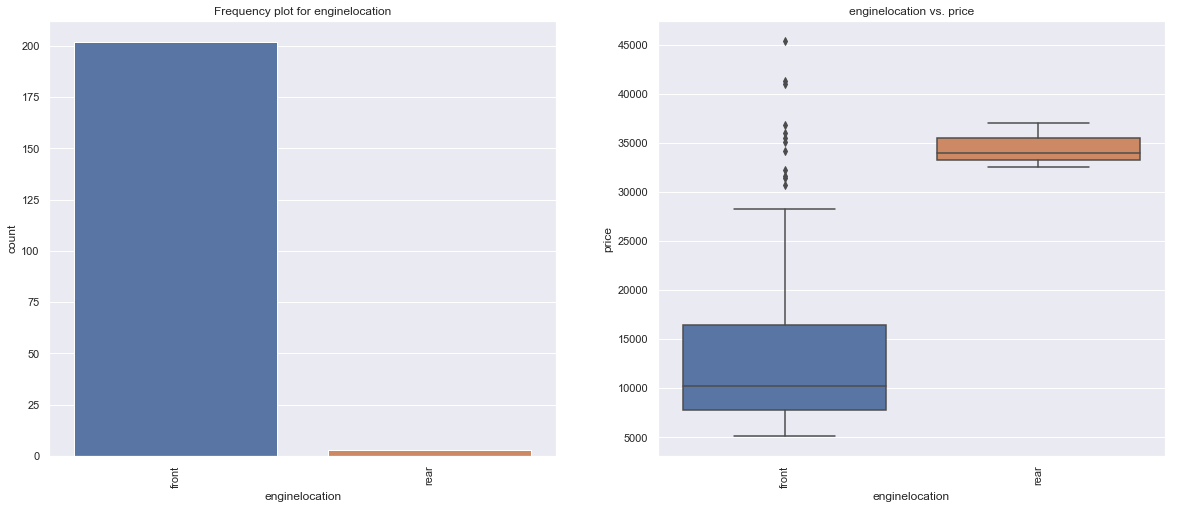

In [27]:
univariate_cat(cars,'enginelocation')

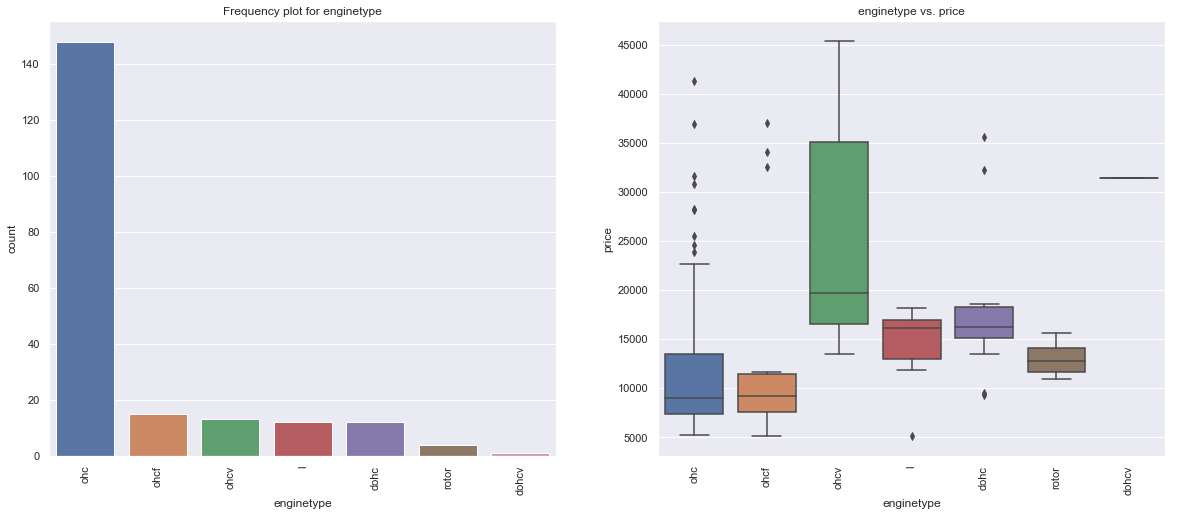

In [28]:
univariate_cat(cars,'enginetype')

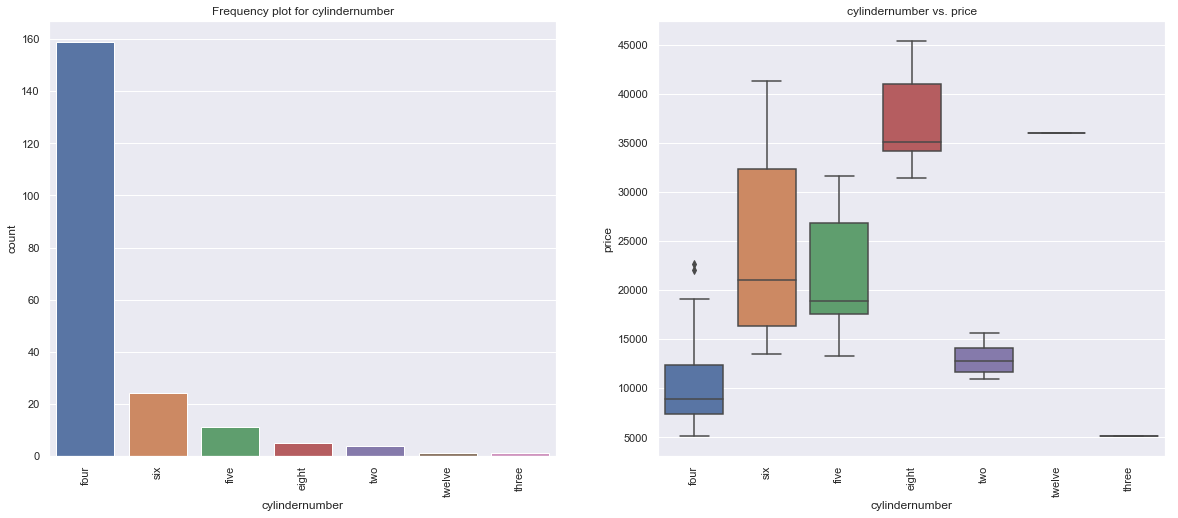

In [29]:
univariate_cat(cars,'cylindernumber')

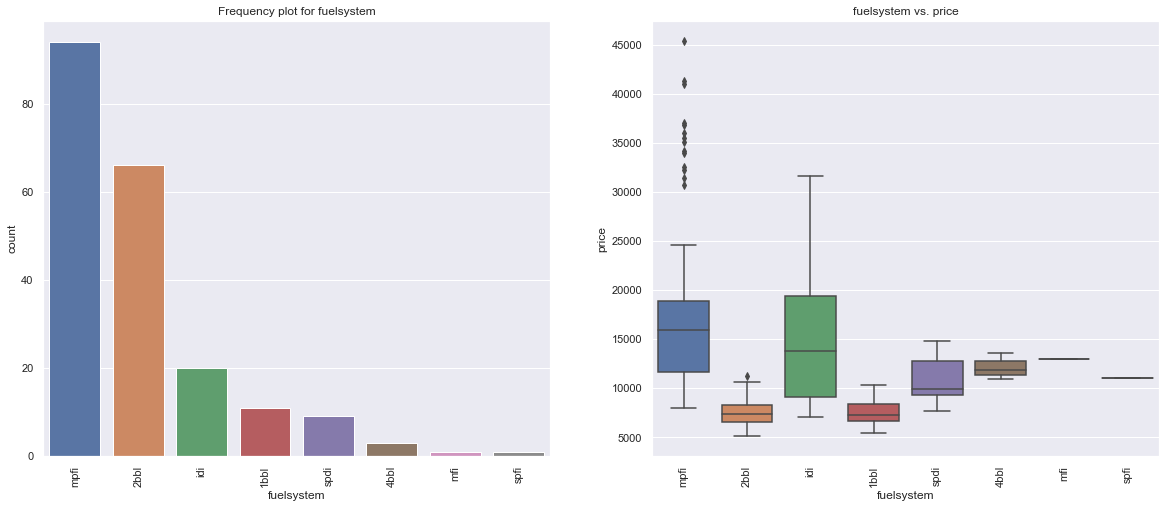

In [30]:
univariate_cat(cars,'fuelsystem')

From the above set of plots, we come to following observations about these variables:

*  **Toyota is the most favoured** car brand in the market almost double of the next highest car brand; nissan. **Toyota's cars are among the cheapest cars** by price. **Jaguar and Buick car brands have the highest average price** in the list.
*  **Gas powered car models heavily outnumber diesel** powered car models; around *10 times* more. **Diesel cars are slightly more expensive.**
*  **Sedan type of car is the most preferred** in the market. **Hardtop and Convertible cars are more expensive** on average, although they have a *high variance* in price.
*  Car brands with **symboling values of 0 and 1 are most sold**. Values of **3 and -2 are priced similarly** which doesn't make that much sense.
*  *ohc engine type is the most favoured*. ohcv engine type has the **highest price range** while ohc and ohcf are in the **lower price range**.
*  Cars having **4 doors are sold slightly more**. Number of doors in the car doesn't seem to affect the price much.
*  *Aspiration with std is more common*, while **aspiration with turbo is in a higher price range**.
*  Looking at engine location, *number of datapoints for rear is very low* to make a proper inference. From the limited points, cars with engine in the rear are more expensive.
*  **Most common engine cylinders is 4**. Cars with **8 engine cylinders are in the highest price range**. 
*  **mpfi and 2bbl are the most common fuel systems**. *mpfi and idi have the highest price range*. Not enough data for the other categories for proper inference.
* **fwd drivewheel is the most common**. However, cars with *rwd drivewheel are more expensive* than fwd and 4wd.

#### 2.2c - Continuous Variable Analysis

Let's analyze the continuous variables in the dataset. <br>

The continuous variables are: **'car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', and 'highwaympg'.**

In [31]:
# function to plot graphs for univariate analysis for continuous variable
def univariate_con_pp(df,col1,col2,col3):
    '''
    Univariate function will plot a scatter plot based on the parameters.
    df      : dataframe name
    col1    : Column name
    col2    : Column name
    col3    : Column name
    '''
    sns.set(style="darkgrid")
    sns.pairplot(data=df,x_vars=[col1,col2,col3], y_vars='price', kind='scatter', height = 5)
    plt.show()

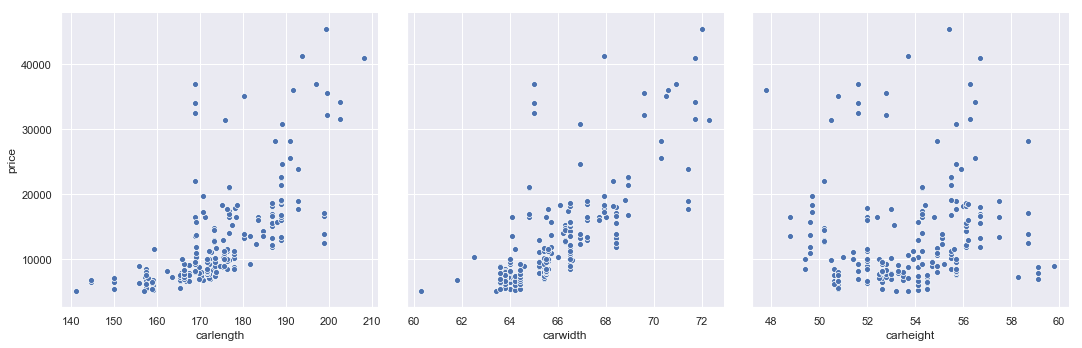

In [32]:
univariate_con_pp(cars,'carlength', 'carwidth', 'carheight')

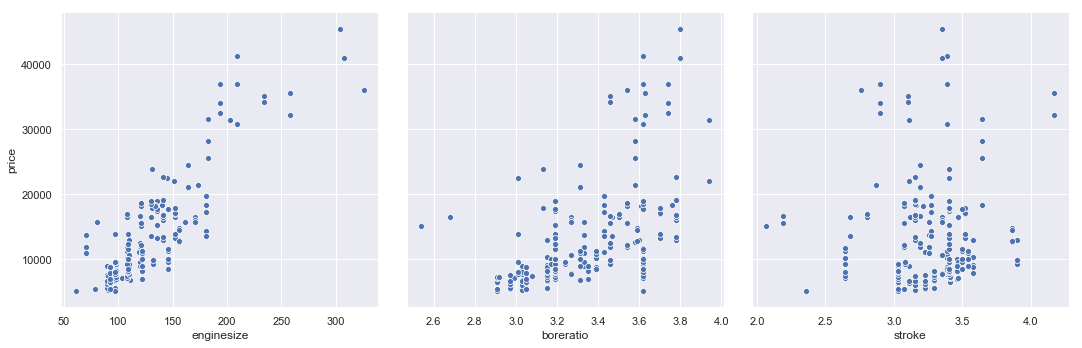

In [33]:
univariate_con_pp(cars,'enginesize', 'boreratio', 'stroke')

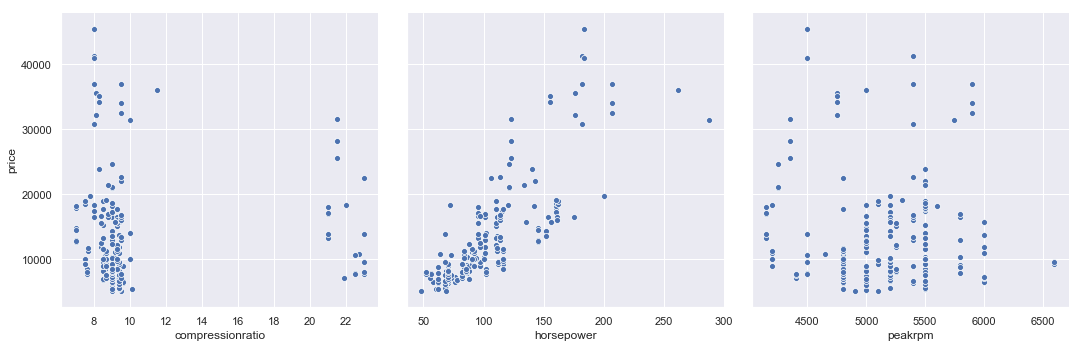

In [34]:
univariate_con_pp(cars,'compressionratio', 'horsepower', 'peakrpm')

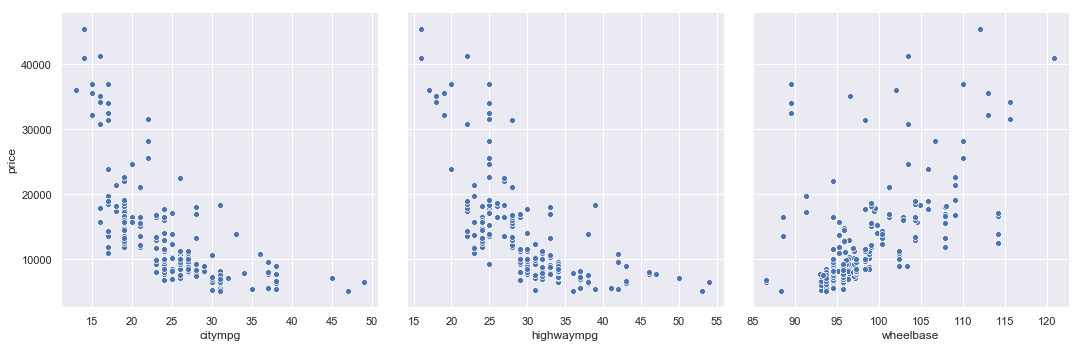

In [35]:
univariate_con_pp(cars,'citympg','highwaympg','wheelbase')

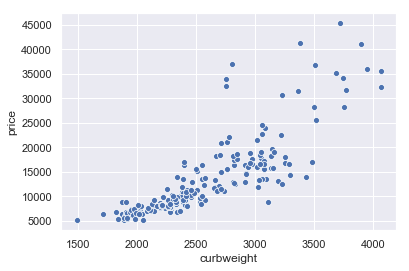

In [36]:
# plotting curbweight scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(data=cars,x='curbweight',y='price')
plt.show()

From the above plots, we can make the following observations:

*  **carlength and carwidth** seem to have a <font color = green> **positive** </font> correlation with car price. **carheight** doesn't show any trend with price.
*  **enginesize and boreratio** seem to have a <font color = green> **positive** </font> correlation with car price. **stroke** doesn't show any significant trend with price.
*  **compressionratio and peakrpm** show no trend with price. **Horsepower** shows a <font color = green> **positive** </font> trend with price.
*  **citympg and highwaympg** show a <font color = red> **negative** </font> correlation with price. Meanwhile **wheelbase** shows a <font color = green> **positive** </font> one.
*  **curbweight** has a <font color = green> **positive** </font> correlation with car price.

#### 2.2d - Derived Variables

As citympg and highway mpg will be correlated, let's derive a new variable by combining citympg and highwaympg to calculate fuel economy.

In [37]:
# creating fuel mileage variable
cars['fuel_mileage'] = (cars.citympg*0.45) + (cars.highwaympg*0.55)

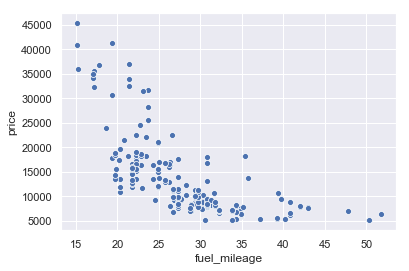

In [38]:
# scatter plot for fuel mileage
plt.figure(figsize=(6,4))
sns.scatterplot(data=cars,x='fuel_mileage',y='price')
plt.show()

From the above, we can see that **fuel mileage** has a significant <font color = red> **negative** </font> correlation with price. <br>
Let's also make another feature based on the range of average prices of each car brand.

In [39]:
# Binning the Car Companies based on avg prices of each Company.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['car_brand'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='car_brand')
bins = [0,10000,20000,40000]
cars_bin=['budget','midrange','highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,car_brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuel_mileage,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,24.30,midrange
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,24.30,midrange
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.85,midrange
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,27.30,midrange
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,20.20,midrange


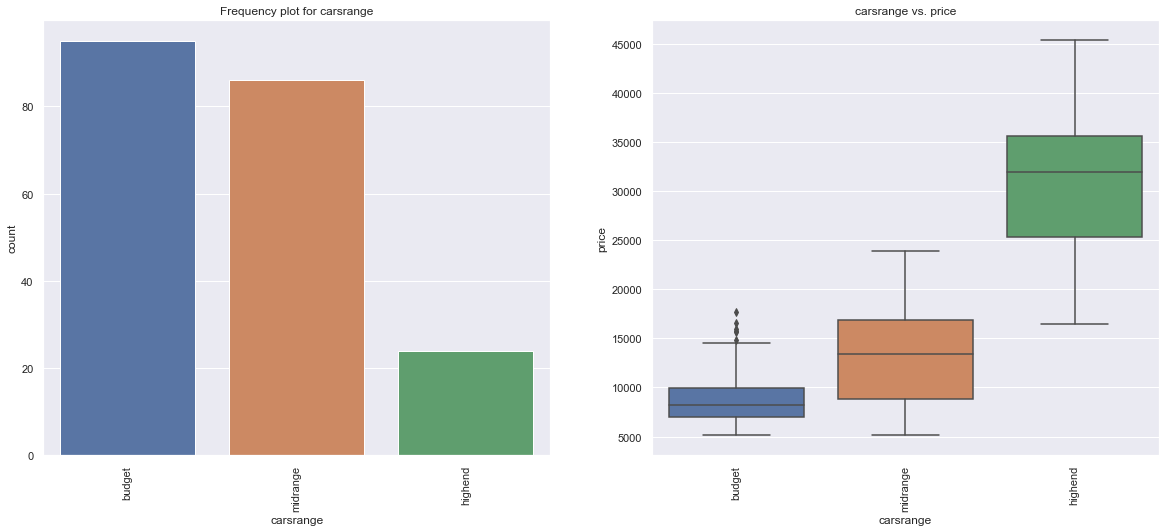

In [40]:
univariate_cat(cars,'carsrange')

From the above plots, we can see that **budget** cars are the most common. **Highend** cars are the highest price range.

#### 2.2e - Bivariate Analysis

From the above univariate analysis, let's analyze all the significant variables against each other and ignore the insignificant variables for our model.

The significant variables are: **'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio',  'horsepower', 'wheelbase', 'fuel_mileage', 'fueltype','carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'aspiration', and 'carsrange'.**

In [41]:
# new variable with only the significant variables and the target variable; price
cars_v2 = cars[['price','carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'wheelbase', 'fuel_mileage', 'fueltype','carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'aspiration', 'carsrange']]
cars_v2.head()

,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_mileage,fueltype,carbody,drivewheel,enginetype,cylindernumber,aspiration,carsrange
0,13495,168.8,64.1,2548,130,3.47,111,88.6,24.30,gas,convertible,rwd,dohc,four,std,midrange
1,16500,168.8,64.1,2548,130,3.47,111,88.6,24.30,gas,convertible,rwd,dohc,four,std,midrange
2,16500,171.2,65.5,2823,152,2.68,154,94.5,22.85,gas,hatchback,rwd,ohcv,six,std,midrange
3,13950,176.6,66.2,2337,109,3.19,102,99.8,27.30,gas,sedan,fwd,ohc,four,std,midrange
4,17450,176.6,66.4,2824,136,3.19,115,99.4,20.20,gas,sedan,4wd,ohc,five,std,midrange


In [42]:
cars_v2.shape

(205, 16)

The dataset started with a total of **26** variables. Based on Univariate analysis with respect to the target variable **price**, only 13 variables showed some relationship to price. These variables along with 2 derived variables **(15 in total)** will be the variables considered for modeling. This is reflected in the shape of the dataset given above; 205 rows and 16 columns **(15 predictor variables and 1 target variable; price).**

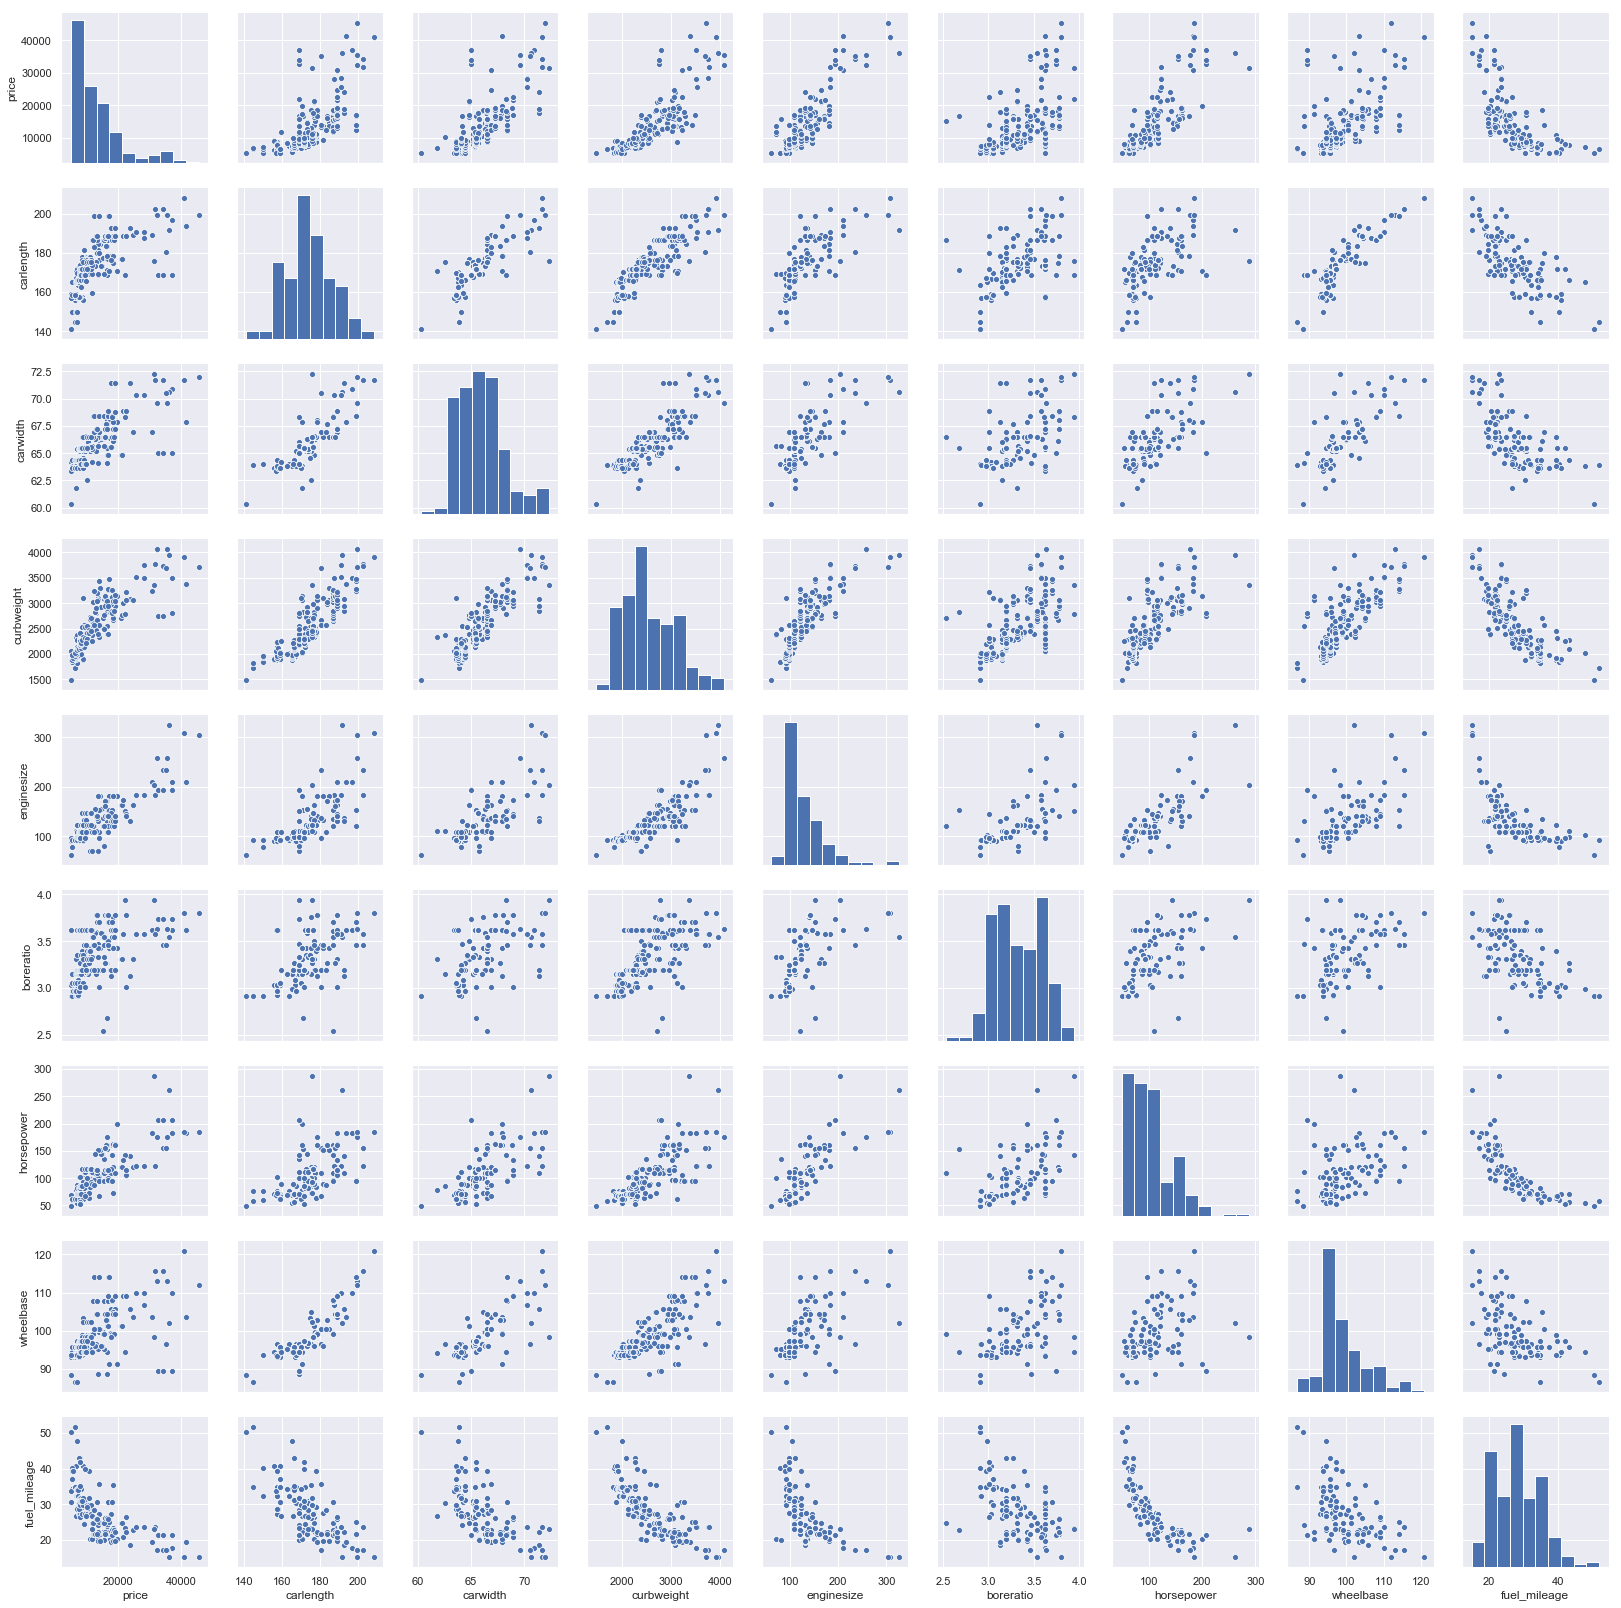

In [43]:
# plotting all the significant variables against each other in a pairplot
sns.pairplot(cars_v2)
plt.show()

### 2.3 Dummy Encoding

In this section, categorical data will be one hot encoded to prepare the data for modeling.

In [44]:
# function to perform dummy encoding
def encoding(df,col):
    dummy = pd.get_dummies(df[col], drop_first = True)
    df = pd.concat([df,dummy], axis=1)
    df.drop([col], axis=1, inplace=True)
    return df

In [45]:
# encoding all the categorical variables 
cars_v2 = encoding(cars_v2,'fueltype')
cars_v2 = encoding(cars_v2,'carbody')
cars_v2 = encoding(cars_v2,'drivewheel')
cars_v2 = encoding(cars_v2,'enginetype')
cars_v2 = encoding(cars_v2,'cylindernumber')
cars_v2 = encoding(cars_v2,'aspiration')
cars_v2 = encoding(cars_v2,'carsrange')

In [46]:
cars_v2.head()

,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_mileage,gas,...,rotor,five,four,six,three,twelve,two,turbo,midrange,highend
0,13495,168.8,64.1,2548,130,3.47,111,88.6,24.30,1,...,0,0,1,0,0,0,0,0,1,0
1,16500,168.8,64.1,2548,130,3.47,111,88.6,24.30,1,...,0,0,1,0,0,0,0,0,1,0
2,16500,171.2,65.5,2823,152,2.68,154,94.5,22.85,1,...,0,0,0,1,0,0,0,0,1,0
3,13950,176.6,66.2,2337,109,3.19,102,99.8,27.30,1,...,0,0,1,0,0,0,0,0,1,0
4,17450,176.6,66.4,2824,136,3.19,115,99.4,20.20,1,...,0,1,0,0,0,0,0,0,1,0


In [47]:
cars_v2.shape

(205, 31)

In [48]:
cars_v2.columns

Index(['price', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'wheelbase', 'fuel_mileage', 'gas',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'turbo', 'midrange', 'highend'],
      dtype='object')

We can see that the categorical columns have been encoded and the original ones in their place have been dropped. The number of columns has increased from **16 to 31**.

## 3 - Model Building

This section consists of: <br>
3.1 - Test-Train Split, Scaling, and X-y split <br>
3.2 - Eliminating Features through RFE <br>
3.3 - Optimizing the linear model through statmodels

### 3.1 - Test-Train Split, Scaling, and X-y split

In this section, the data will be split into testing and training data. The features will be scaled. We will check for correlated independent variables. Finally, the training data will be split into X (predictor variables) and y (dependent variable).

In [49]:
# applying train test split on cars_v2 data
cars_train, cars_test = train_test_split(cars_v2, train_size = 0.70, test_size = 0.30, random_state = 100)

In [50]:
# scaler object
scaler = MinMaxScaler()

In [51]:
# applying scaling to all the variables except the binary ones and newly created dummy variables
scale_vars = ['price', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'wheelbase', 'fuel_mileage']
cars_train[scale_vars] = scaler.fit_transform(cars_train[scale_vars])
cars_train.head()

,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_mileage,gas,...,rotor,five,four,six,three,twelve,two,turbo,midrange,highend
122,0.068818,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.244828,0.537620,1,...,0,0,1,0,0,0,0,0,0,0
125,0.466890,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.272414,0.224350,1,...,0,0,1,0,0,0,0,0,0,1
166,0.122110,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.272414,0.340629,1,...,0,0,1,0,0,0,0,0,0,0
1,0.314446,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.068966,0.248974,1,...,0,0,1,0,0,0,0,0,1,0
199,0.382131,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.610345,0.124487,1,...,0,0,1,0,0,0,0,1,1,0


In [52]:
cars_train.describe()

,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_mileage,gas,...,rotor,five,four,six,three,twelve,two,turbo,midrange,highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.411141,0.361340,0.909091,...,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.181818,0.412587,0.118881
std,0.215682,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.205581,0.186219,0.288490,...,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.387050,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.272414,0.207934,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.341379,0.340629,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.503448,0.515048,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


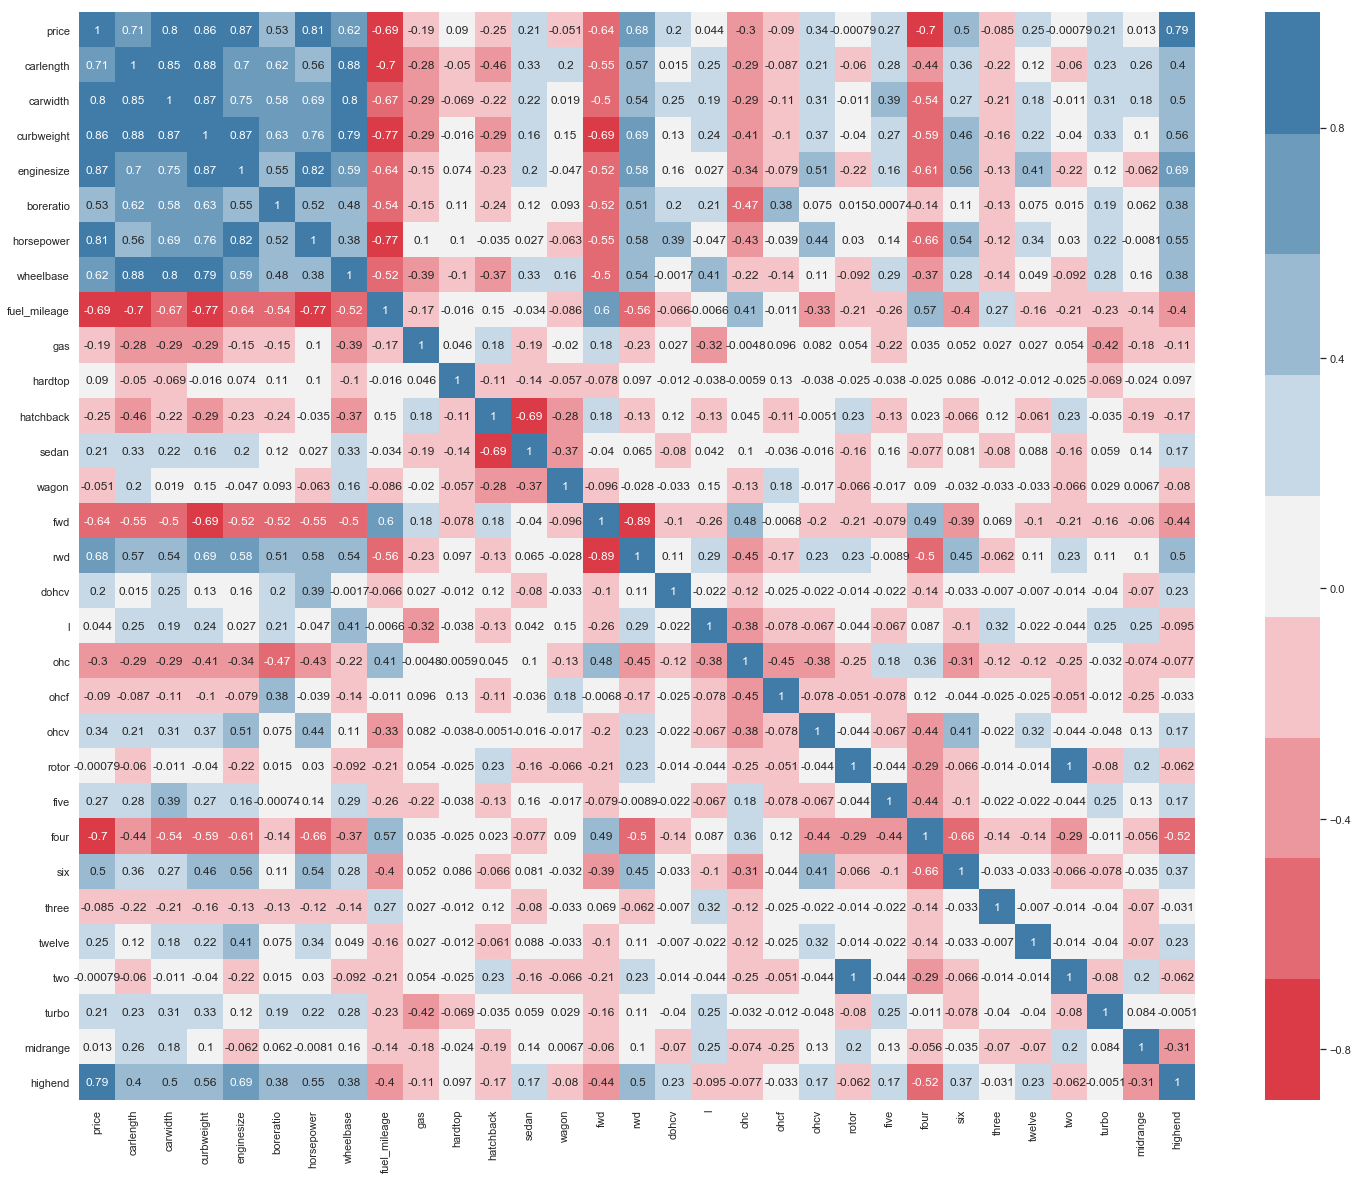

In [53]:
# plotting correlation heatmap to find out the correlation coefficients between variables 

plt.figure(figsize=(25,20))
sns.heatmap(cars_train.corr(), annot = True, cmap=sns.diverging_palette(10, 240, n=9))
plt.show()

From the above heatmap, the variables most correlated to price are **enginesize, curbweight, horsepower, and carwidth.** *(Above |0.8| correlation).* <br>
Following these variables, **highend, carlength, and four** are most correlated to price. *(Above |0.7| correlation).* <br>

However, some of the variables which are highly correlated to price display signs of **collinearity** which will be dealt while building the model.

In [54]:
# splitting the training data into X and y
y_train = cars_train.pop('price')
X_train = cars_train

### 3.2 - Eliminating Features through RFE

We will start by using **RFE (Recursive Feature Elimination)** to reduce the amount of variables from **31 to 10**. The algorithm will select the top 10 features and assign it the highest rank; 1. It will also rank the other variables.

In [55]:
# creating linear regression object and fitting it
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# setting output to 10 for rfe and running it
rfe_lm = RFE(linear_model, 10)
rfe_lm = rfe_lm.fit(X_train, y_train)

In [56]:
# printing the ranking of the features
list(zip(X_train.columns, rfe_lm.support_, rfe_lm.ranking_))

[('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('wheelbase', False, 3),
 ('fuel_mileage', True, 1),
 ('gas', False, 17),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('turbo', False, 18),
 ('midrange', False, 12),
 ('highend', True, 1)]

In [57]:
# printing the features selected by RFE
rfe_cols = X_train.columns[rfe_lm.support_]
rfe_cols

Index(['carwidth', 'curbweight', 'horsepower', 'fuel_mileage', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'highend'],
      dtype='object')

The RFE algorithm has selected the best 10 features among the 30 predictor variables. These are: **'carwidth', 'curbweight', 'horsepower', 'fuel_mileage', 'hatchback', 'sedan', 'wagon', 'dohcv', 'twelve', and 'highend'.**

### 3.3 - Optimizing the linear model through statmodels

This section contains functions to build the linear model and calculate the VIF values to measure collinearity. <br>

The **initial model** is built using the features recommended by the **RFE algorithm**. We will check if the model and features are **statistically significant through p-values and with a VIF value of less than 5**. Any features which don't meet the 2 above criteria are **dropped** from the model. <br>

The above process is **repeated till an optimal model** is reached. This entire process is done through the **statsmodels** library.

In [58]:
# functions to build the linear model
def build_linear_model(X_train, y_train):
    X_train = sm.add_constant(X_train) # adding the constant 
    linear_model = sm.OLS(y_train, X_train).fit() # fitting the model using Ordinary Least Squares algorithm (OLS)
    print(linear_model.summary()) # printing statistics summary

In [59]:
# function to check the VIF values
def VIF_values(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

####  Model 1

In [60]:
# new dataframe with the selected features from RFE
X_train_rfe = X_train[rfe_cols]

In [61]:
build_linear_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           1.32e-70
Time:                        01:53:49   Log-Likelihood:                 205.82
No. Observations:                 143   AIC:                            -389.6
Df Residuals:                     132   BIC:                            -357.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0948      0.042     -2.230   

In [62]:
VIF_values(X_train_rfe)

,Features,VIF
1,curbweight,39.53
0,carwidth,36.38
2,horsepower,12.52
5,sedan,9.73
4,hatchback,6.94
3,fuel_mileage,6.80
6,wagon,3.34
9,highend,1.87
7,dohcv,1.50
8,twelve,1.20


From the results of the initial model, **r^2 score is 92.9% while adjusted r^2 score is 92.3%.** <br>

The prob(F-statistic) is very low, which means our model fit is **significant** and not by random chance. <br>

However, there are features with p-values over 0.05 and a lot of features with VIF values over 5. Let's first drop the **fuel_mileage** feature which has a p-value over 0.05 and a VIF over 5. 

####  Model 2

In [63]:
# dropping the insignificant feature
X_train_v2 = X_train_rfe.drop(["fuel_mileage"], axis = 1)

In [64]:
build_linear_model(X_train_v2, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.42e-71
Time:                        01:53:49   Log-Likelihood:                 204.13
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0352      0.026     -1.338      0.1

In [65]:
VIF_values(X_train_v2)

,Features,VIF
1,curbweight,39.01
0,carwidth,36.10
2,horsepower,11.46
4,sedan,4.69
3,hatchback,2.96
5,wagon,2.10
8,highend,1.87
6,dohcv,1.48
7,twelve,1.20


After dropping the **fuel_mileage** feature, r^2 and adjusted r^2 values have very slightly decreased.

In this model, the **twelve** feature will be dropped, as it has a p-value of over 0.05.

####  Model 3

In [66]:
# dropping the insignificant feature
X_train_v3 = X_train_v2.drop(["twelve"], axis = 1)

In [67]:
build_linear_model(X_train_v3, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           7.85e-72
Time:                        01:53:49   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [68]:
VIF_values(X_train_v3)

,Features,VIF
1,curbweight,38.51
0,carwidth,36.09
2,horsepower,10.32
4,sedan,4.69
3,hatchback,2.95
5,wagon,2.10
7,highend,1.85
6,dohcv,1.44


In this model, there are no more features with p-values over 0.05. However, there are 3 features with VIF values over 5. <br>
As the **curbweight** feature has the highest VIF of 38.51 which is well over 5, it will be dropped.

####  Model 4

In [69]:
# dropping the insignificant feature
X_train_v4 = X_train_v3.drop(["curbweight"], axis = 1)

In [70]:
build_linear_model(X_train_v4,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.70e-70
Time:                        01:53:50   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [71]:
VIF_values(X_train_v4)

,Features,VIF
0,carwidth,14.94
1,horsepower,7.15
3,sedan,4.65
2,hatchback,2.78
4,wagon,1.99
6,highend,1.76
5,dohcv,1.19


There are no features which are not statistically insignificant. However, we still have 2 features with VIF value over 5. <br>
Next, the **carwidth** feature will be dropped as it has the highest VIF value of 14.94.

####  Model 5

In [72]:
# dropping the feature with high VIF
X_train_v5 = X_train_v4.drop(["carwidth"], axis = 1)

In [73]:
build_linear_model(X_train_v5, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     136.9
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           4.18e-55
Time:                        01:53:50   Log-Likelihood:                 156.48
No. Observations:                 143   AIC:                            -299.0
Df Residuals:                     136   BIC:                            -278.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0447      0.035      1.293      0.1

In [74]:
VIF_values(X_train_v5)

,Features,VIF
0,horsepower,4.07
2,sedan,1.97
5,highend,1.72
1,hatchback,1.71
3,wagon,1.24
4,dohcv,1.19


After dropping the **carwidth** feature, we have 2 variables which have p-values over 0.05. Also the r^2 and adjusted r^2 values have decreased around 6% each to 85.8% and 85.2% respectively. <br>
Next feature to be dropped is **sedan** as it has a p-value of 0.723.

####  Model 6

In [75]:
# dropping the feature with high VIF
X_train_v6 = X_train_v5.drop(["sedan"], axis = 1)

In [76]:
build_linear_model(X_train_v6, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     165.3
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           3.29e-56
Time:                        01:53:50   Log-Likelihood:                 156.41
No. Observations:                 143   AIC:                            -300.8
Df Residuals:                     137   BIC:                            -283.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0336      0.015      2.291      0.0

In [77]:
VIF_values(X_train_v6)

,Features,VIF
0,horsepower,2.39
4,highend,1.70
1,hatchback,1.41
2,wagon,1.13
3,dohcv,1.11


In this model, we only have one feature which has a p-value over 0.05. r^2 and adjusted r^2 score has not changed. <br>
Next feature to be dropped is **wagon**.

####  Model 7

In [78]:
# dropping the feature with high VIF
X_train_v7 = X_train_v6.drop(["wagon"], axis = 1)

In [79]:
build_linear_model(X_train_v7, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     207.5
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           2.56e-57
Time:                        01:53:50   Log-Likelihood:                 156.22
No. Observations:                 143   AIC:                            -302.4
Df Residuals:                     138   BIC:                            -287.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0306      0.014      2.222      0.0

In [80]:
VIF_values(X_train_v7)

,Features,VIF
0,horsepower,2.12
3,highend,1.66
1,hatchback,1.37
2,dohcv,1.11


We finally have reached the **optimal model** where we don't have any more features to drop as there are **no features** which are statistically insignificant (p-value over 0.05) or with high collinearity (VIF > 5) with the other predictor variables.

The training r^2 score is **85.7%** and the adjusted r^2 score is **85.3%**.

The **prob(F-statistic)** score is extremely low which indicates this iteration of the model is significant. The **AIC and BIC** values are also very low indicating a good model.

## 4. Model Evaluation

In this section, we will evaluate the model and use it to predict the price for the testing dataset.

Contains the following parts: <br>
4.1 - Residual Analysis <br>
4.2 - Predicting on the Test Data <br>
4.3 - Evaluating the Model <br>

### 4.1 - Residual Analysis

We will check the residuals to ensure the assumptions of linear regression are not violated.

In [81]:
# have to run this regression again to save the linear_model from X_train_v7 globally
X_train_v7 = sm.add_constant(X_train_v7)
linear_model = sm.OLS(y_train, X_train_v7).fit()

In [82]:
# predicting the price values for training data
y_train_pred = linear_model.predict(X_train_v7)

Text(0.5, 0.98, 'Error Terms')

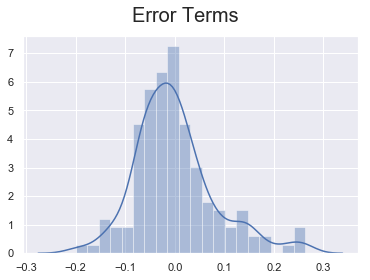

In [83]:
# plotting a histogram of the error terms (actual - predicted)
ax = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
ax.suptitle('Error Terms', fontsize = 20)

Error terms seem to be normally distributed, so our assumptions on the linear model are not violated.

### 4.2 - Prediction on Test Data

In this section, we will predict the price values on the test data and see how well the model performs.

In [84]:
# applying scaling on test dataset
scale_vars = ['price', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'wheelbase', 'fuel_mileage']
cars_test[scale_vars] = scaler.transform(cars_test[scale_vars])
cars_test.head()

,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_mileage,gas,...,rotor,five,four,six,three,twelve,two,turbo,midrange,highend
160,0.072382,0.409756,0.341667,0.235066,0.139623,0.404762,0.091667,0.313793,0.759234,1,...,0,0,1,0,0,0,0,0,0,0
186,0.093295,0.497561,0.433333,0.305275,0.181132,0.404762,0.154167,0.368966,0.428181,1,...,0,0,1,0,0,0,0,0,1,0
59,0.102964,0.596748,0.516667,0.347944,0.230189,0.563492,0.150000,0.420690,0.385773,1,...,0,0,1,0,0,0,0,0,1,0
165,0.115479,0.448780,0.308333,0.301396,0.139623,0.444444,0.266667,0.272414,0.340629,1,...,0,0,1,0,0,0,0,0,0,0
140,0.068652,0.263415,0.291667,0.291699,0.177358,0.746032,0.104167,0.231034,0.370725,1,...,0,0,1,0,0,0,0,0,0,0


In [85]:
cars_test.shape

(62, 31)

In [86]:
cars_test.describe()

,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_mileage,gas,...,rotor,five,four,six,three,twelve,two,turbo,midrange,highend
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.000000,62.000000
mean,0.239439,0.559481,0.480376,0.428470,0.265673,0.556580,0.248858,0.437764,0.348219,0.887097,...,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.177419,0.435484,0.112903
std,0.233076,0.189947,0.165440,0.179488,0.162820,0.228484,0.163376,0.212861,0.176036,0.319058,...,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.385142,0.499868,0.319058
min,0.007763,0.056911,0.183333,0.128394,0.067925,-0.111111,0.016667,0.000000,-0.002736,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.092342,0.459350,0.358333,0.305275,0.177358,0.404762,0.107292,0.313793,0.198016,1.000000,...,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,0.158991,0.547967,0.441667,0.406129,0.226415,0.563492,0.218750,0.387931,0.331053,1.000000,...,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,0.317243,0.719919,0.516667,0.564876,0.316038,0.746032,0.295833,0.570690,0.452120,1.000000,...,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000
max,1.112855,1.089431,0.975000,0.935609,0.932075,0.888889,0.662500,1.182759,0.759234,1.000000,...,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [87]:
# dividing dataset into X and y
y_test = cars_test.pop('price')
X_test = cars_test

In [88]:
# adding constant
X_test = sm.add_constant(X_test)

In [89]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_v7 = X_test[X_train_v7.columns]

In [90]:
# Making predictions
y_test_pred = linear_model.predict(X_test_v7)

In [91]:
# evaluating the r^2 score on the predicted test set
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8608612212755917

The above score indicates that the *r^2 score of the optimal model (7th model)* on the **testing** data set yielded an accuracy of **86.1%**. <br>

The model's r^2 score on the training data was **85.8%.** As both the values are extremely close, we can be sure that our model predicted the testing dataset really well.

### 4.3 - Evaluating the Model and Conclusion

In this we will plot residuals of price for the test data and conclude the project.

Text(0, 0.5, 'y_pred')

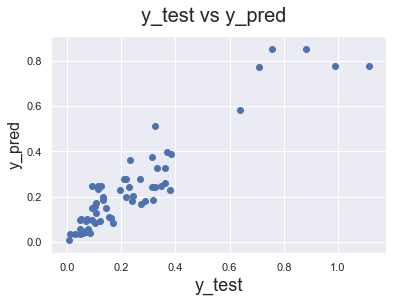

In [92]:
# plotting actual vs. predicted values for the test data

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) # title
plt.xlabel('y_test', fontsize=18) # label for x-axis
plt.ylabel('y_pred', fontsize=16) # label for y-axis

In [93]:
linear_model.params

const         0.030584
horsepower    0.769246
hatchback    -0.061181
dohcv        -0.324722
highend       0.312156
dtype: float64

#### Conclusion

We can see that the final equation of the best fitted line is:

$ price = 0.031 + (0.769 \times horsepower) + (-0.061 \times hatchback) + (-0.325 \times dohcv) + (0.312 \times highend) $ 

This is a very good model given the dataset and can be presented to the management. We can still slightly improve the model by adding more features (new or derived).